In [1]:
# load JSON
import json

import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt



# hourly data 
data = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-PM10.pkl')
data = data.sort_values(by=['ds'])
data['year'] = data['ds'].dt.year
data['month'] = data['ds'].dt.month
data['day'] = data['ds'].dt.day
data['hour'] = data['ds'].dt.hour
data['weekday'] = data['ds'].dt.weekday
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-temp.pkl')
data['temp'] = data2.y
data2 = pd.read_pickle('franklin-d-roosevelt/airQualityDataframe-franklin-d-roosevelt-humidity.pkl')
data['humi'] = data2.y

In [2]:
df = data[40000:45000]
df = df.drop(columns="ds")
df = df.dropna()
print(len(df)*0.8)
df = df
df.tail()

3677.6000000000004


,y,year,month,day,hour,weekday,temp,humi
23480,110.0,2018,2,19,16,0,15.5,54.8
22939,49.0,2018,2,19,17,0,15.6,53.2
53240,19.0,2018,2,19,18,0,15.7,52.8
22943,21.0,2018,2,19,19,0,15.9,52.0
53241,19.0,2018,2,19,20,0,15.8,51.6


In [3]:
# summarize data
print(df.shape)
df.describe()

(4597, 8)


,y,year,month,day,hour,weekday,temp,humi
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,69.988253,2017.242114,7.854905,15.878616,11.387644,2.970633,19.917664,46.671220
std,63.220623,0.428410,3.879669,8.903680,6.803330,1.995591,4.308874,7.404787
min,5.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,11.200000,26.600000
25%,28.000000,2017.000000,7.000000,8.000000,6.000000,1.000000,16.400000,41.200000
50%,47.000000,2017.000000,9.000000,16.000000,11.000000,3.000000,18.800000,45.900000
75%,93.000000,2017.000000,11.000000,24.000000,17.000000,5.000000,23.500000,51.700000
max,643.000000,2018.000000,12.000000,31.000000,23.000000,6.000000,31.000000,72.200000


In [4]:
# normalize
target_column = ['y'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe()

,y,year,month,day,hour,weekday,temp,humi
count,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000,4597.000000
mean,69.988253,0.999624,0.654575,0.512213,0.495115,0.495106,0.642505,0.646416
std,63.220623,0.000212,0.323306,0.287215,0.295797,0.332599,0.138996,0.102559
min,5.000000,0.999504,0.083333,0.032258,0.000000,0.000000,0.361290,0.368421
25%,28.000000,0.999504,0.583333,0.258065,0.260870,0.166667,0.529032,0.570637
50%,47.000000,0.999504,0.750000,0.516129,0.478261,0.500000,0.606452,0.635734
75%,93.000000,0.999504,0.916667,0.774194,0.739130,0.833333,0.758065,0.716066
max,643.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(3217, 7)
(1380, 7)


In [6]:
# RANDOM FOREST
#RF model
model_rf = RandomForestRegressor(n_estimators=1000, oob_score=True, random_state=100)
model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

/home/aety/anaconda3/envs/insight/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


12.284513703568715
0.9630362804179826
30.76038581982974
0.7504394855577755


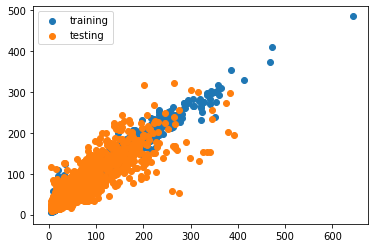

In [20]:
# PLOT RANDOM FOREST results
plt.scatter(y_train,pred_train_rf)
plt.scatter(y_test,pred_test_rf)
plt.legend(('training','testing'))

In [7]:
## DECISION TREE
#dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
#
#dtree.fit(X_train, y_train)
#
## Code lines 1 to 3
#pred_train_tree= dtree.predict(X_train)
#print(np.sqrt(mean_squared_error(y_train,pred_train_tree)))
#print(r2_score(y_train, pred_train_tree))
#
## Code lines 4 to 6
#pred_test_tree= dtree.predict(X_test)
#print(np.sqrt(mean_squared_error(y_test,pred_test_tree))) 
#print(r2_score(y_test, pred_test_tree))

In [8]:
## DECISION TREE--more tweaking
## Code Lines 1 to 4: Fit the regression tree 'dtree1' and 'dtree2' 
#dtree1 = DecisionTreeRegressor(max_depth=2)
#dtree2 = DecisionTreeRegressor(max_depth=5)
#dtree1.fit(X_train, y_train)
#dtree2.fit(X_train, y_train)

## Code Lines 5 to 6: Predict on training data
#tr1 = dtree1.predict(X_train)
#tr2 = dtree2.predict(X_train) 

##Code Lines 7 to 8: Predict on testing data
#y1 = dtree1.predict(X_test)
#y2 = dtree2.predict(X_test) 

## Print RMSE and R-squared value for regression tree 'dtree1' on training data
#print(np.sqrt(mean_squared_error(y_train,tr1))) 
#print(r2_score(y_train, tr1))

## Print RMSE and R-squared value for regression tree 'dtree1' on testing data
#print(np.sqrt(mean_squared_error(y_test,y1))) 
#print(r2_score(y_test, y1)) 

## Print RMSE and R-squared value for regression tree 'dtree2' on training data
#print(np.sqrt(mean_squared_error(y_train,tr2))) 
#print(r2_score(y_train, tr2))

## Print RMSE and R-squared value for regression tree 'dtree2' on testing data
#print(np.sqrt(mean_squared_error(y_test,y2))) 
#print(r2_score(y_test, y2)) 